# Text Analysis of Succession - 4x10 "With Open Eyes" - Post Episode Discussion from Reddit

In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 4.8 MB/s eta 0:00:00


In [2]:
!pip install --upgrade praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Connection to Reddit

In [ ]:
''' # create a Reddit instance
reddit = praw.Reddit(client_id='your_client_id',
                     client_secret='your_client_secret',
                     username='your_username',
                     password='your_password',
                     user_agent='your_user_agent')
'''

import pickle

# Open the reddit variable with app values as a pickle file
with open('reddit.pickle', 'rb') as f:
    reddit = pickle.load(f)

In [6]:
import re

# example Reddit post URL
url = 'https://www.reddit.com/r/SuccessionTV/comments/13uiaqq/succession_4x10_with_open_eyes_post_episode/'

# extract the subreddit name and post ID from the URL
match = re.search(r'/r/(\w+)/comments/(\w+)/', url)
subreddit_name = match.group(1)
post_id = match.group(2)

print(subreddit_name, post_id)

SuccessionTV 13uiaqq


## Sentiment Analysis

We'll be doing an analysis of 499 posts.

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [8]:
import warnings
warnings.filterwarnings("ignore", message=".*Using an asynchronous PRAW instance.*")


In [9]:
# get the subreddit and post using PRAW
subreddit = reddit.subreddit(subreddit_name)
post = reddit.submission(id=post_id)

# analyze the sentiment of each comment in the post
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    print(f"Comment: {comment.body}")
    print(f"Sentiment: {sentiment}\n")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: *But I got you. I got just enough capital.*
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: An unexpected highlight for me: learning Karolina’s true feelings about Hugo.
Sentiment: {'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.6369}

Comment: “I’m the eldest boy!” 

Jeremy Strong nailed Ken’s spiral in the conference room, that entire sequence was painful to watch
Sentiment: {'neg': 0.118, 'neu': 0.735, 'pos': 0.147, 'compound': 0.1759}

Comment: This relationship between Roman and Ken really shows how disturbed these kids really are.
Sentiment: {'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4336}

Comment: Greg translating the Swedish in real time is the smartest thing he’s ever done and it’s not even close.
Sentiment: {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.6124}

Comment: Did y'all notice that when everyone was choosing things from Logan's penthouse, Greg chose the bell that he accidentally rang in the second episo

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# analyze the sentiment of each comment in the post
compound_scores = []
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    compound_scores.append(sentiment['compound'])

# calculate the average compound score and print the results
average_score = sum(compound_scores) / len(compound_scores)
num_comments = len(compound_scores)
print(f"Analyzed {num_comments} comments with an average compound score of {average_score:.2f}")


Analyzed 500 comments with an average compound score of 0.08


A compound score of 0.08 is positive but close to neutral, which means that the analyzed comments may contain a mix of positive and negative sentiment, but overall the sentiment leans slightly towards the positive side. 


## Wordcloud

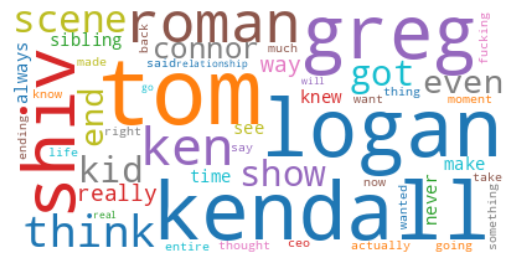

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# extract the comments from the post and remove any MoreComments objects
comments = [comment.body for comment in post.comments.list() if not isinstance(comment, praw.models.MoreComments)]

# add custom stopwords
stop_words = set(STOPWORDS)
stop_words.update(["s", "t", "one", "get", "would", "like", "re" "ve", "m"])

# remove stopwords and convert text to lowercase
clean_text = " ".join([word.lower() for word in " ".join(comments).split() if word.lower() not in stop_words])

# generate the wordcloud
color_map = plt.get_cmap('tab10') # create a custom color map
wordcloud = WordCloud(stopwords=stop_words, max_words=50, background_color="white", colormap=color_map).generate(clean_text)

# display the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## LSA

In [12]:
import numpy as np
import pandas as pd

# create a pandas DataFrame with a single column called "comments"
df = pd.DataFrame(comments, columns=["comments"])

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# stopwords in english
stop_words_en = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
def clean_text(headline):
  le = WordNetLemmatizer()
  word_tokens = word_tokenize(headline)
  tokens = [le.lemmatize(x) for x in word_tokens 
            if x not in stop_words_en and len(x) > 3]
  clean_text = " ".join(tokens)
  return clean_text

In [15]:
df['clean_comments'] = df['comments'].apply(clean_text)
df['clean_comments']

# aplicamos stemming
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
df['stemmed_comments'] = [stemmer.stem(word) for word in df['clean_comments']]
df['stemmed_comments']

0                                           enough capit
1      unexpected highlight learning karolina true fe...
2      eldest jeremy strong nailed spiral conference ...
3      this relationship roman really show disturbed ...
4      greg translating swedish real time smartest th...
                             ...                        
495                           punching portion logan car
496                             stare intently know ....
497    glad scene think major theme show everyone goo...
498    right never looked greg would thought threaten...
499                       interested find greg make year
Name: stemmed_comments, Length: 500, dtype: object

In [16]:
df

,comments,clean_comments,stemmed_comments
0,*But I got you. I got just enough capital.*,enough capital,enough capit
1,An unexpected highlight for me: learning Karol...,unexpected highlight learning Karolina true fe...,unexpected highlight learning karolina true fe...
2,“I’m the eldest boy!” \n\nJeremy Strong nailed...,eldest Jeremy Strong nailed spiral conference ...,eldest jeremy strong nailed spiral conference ...
3,This relationship between Roman and Ken really...,This relationship Roman really show disturbed ...,this relationship roman really show disturbed ...
4,Greg translating the Swedish in real time is t...,Greg translating Swedish real time smartest th...,greg translating swedish real time smartest th...
...,...,...,...
495,We just didn't see the punching bag portion of...,punching portion Logan career,punching portion logan car
496,"*stares intently*\n\n""I know you....""",stare intently know ....,stare intently know ....
497,I was so glad we got that scene. I think a maj...,glad scene think major theme show everyone goo...,glad scene think major theme show everyone goo...
498,Oh my god you're right! I never looked into it...,right never looked Greg would thought threaten...,right never looked greg would thought threaten...


In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

svd_model = TruncatedSVD(n_components = 5, random_state = 42)
tfvec = TfidfVectorizer()
tf_p = tfvec.fit_transform(df.stemmed_comments)
svd_model.fit(tf_p)
terms = tfvec.get_feature_names_out()

for i, component in enumerate(svd_model.components_):
  terminos = zip(terms, component)
  top_terminos = sorted(terminos, key = lambda x: x[1], reverse = True)[:7]
  lista_temas = list(dict(top_terminos).keys())
  print("Topic "+str(i+1)+": ", lista_temas)

Topic 1:  ['shiv', 'logan', 'kendall', 'roman', 'greg', 'like', 'would']
Topic 2:  ['greg', 'would', 'know', 'shiv', 'told', 'knew', 'sticker']
Topic 3:  ['shiv', 'fucking', 'right', 'shot', 'room', 'marri', 'excel']
Topic 4:  ['eldest', 'connor', 'logan', 'like', 'know', 'yeah', 'young']
Topic 5:  ['know', 'kendall', 'eldest', 'connor', 'roman', 'also', 'knew']
